# Load Requirements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import librosa
import pandas as pd
import os
import sys
sys.path.append('/home/hy381/model_training/src')
import seaborn as sns
from data import DataLoader

2025-03-24 10:26:42.784358: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 10:26:44.326412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742812004.884271  944992 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742812005.057287  944992 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742812006.495541  944992 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
os.chdir('/home/hy381/rds/hpc-work/segmented_data_new')
data_labels = pd.read_csv('data_labels.csv')

# Train, Valid, Test Set Distribution

In [15]:
import seaborn as sns

In [3]:
data_loader = DataLoader()
train_files, valid_files, test_files = data_loader.split_train_valid_test()
all_files = np.concatenate([train_files, valid_files, test_files])
train_labels = data_labels.loc[data_labels['file'].isin(train_files), 'label'].value_counts()
valid_labels = data_labels.loc[data_labels['file'].isin(valid_files), 'label'].value_counts()
test_labels = data_labels.loc[data_labels['file'].isin(test_files), 'label'].value_counts()
all_labels = data_labels.loc[data_labels['file'].isin(all_files), 'label'].value_counts()

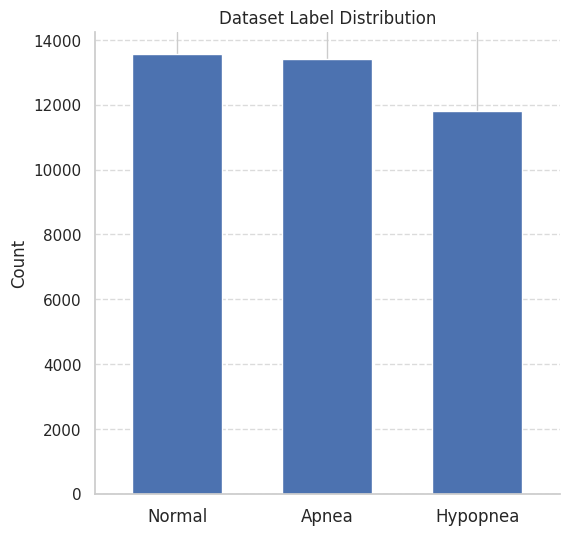

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set an improved theme with better colors
sns.set_theme(style="whitegrid")

# Define figure size
fig, ax = plt.subplots(figsize=(6, 6))

# Define labels
labels = ['Normal', 'Apnea', 'Hypopnea']

# Plot bar chart
all_labels.plot(kind='bar', ax=ax,width=0.6)

# Set x-tick labels correctly
ax.set_xticklabels(labels, rotation=0, fontsize=12)

# Improve y-axis readability
ax.set_ylabel("Count")

# Improve title styling
ax.set_title("Dataset Label Distribution")

# Add grid with transparency for a subtle effect
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Remove top and right spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show plot
plt.show()


In [42]:
len(train_files) + len(valid_files) + len(test_files)

38806

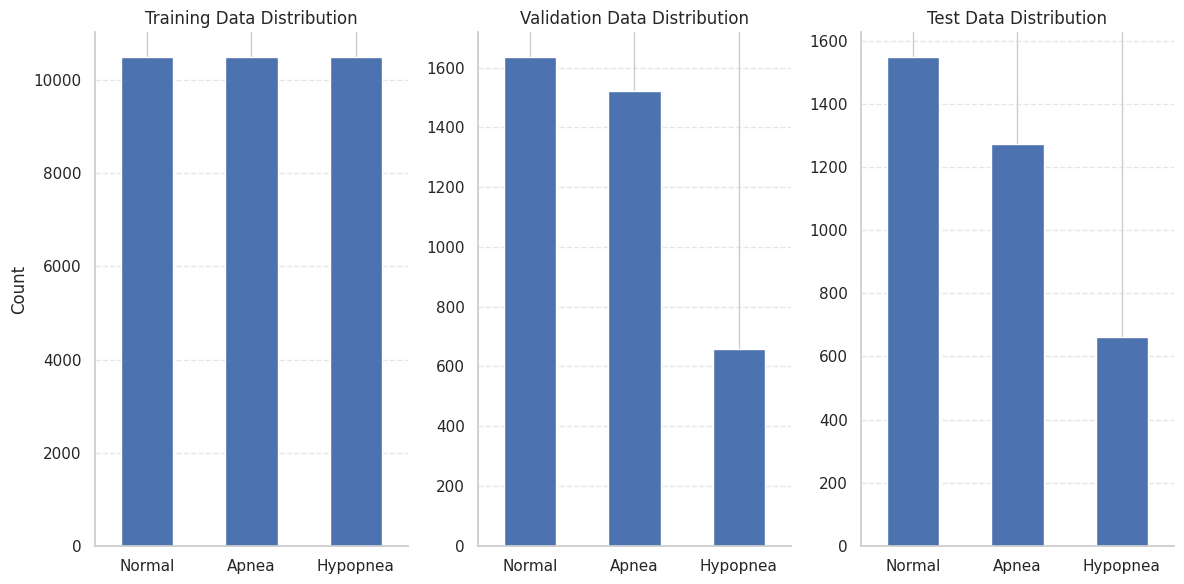

In [66]:
sns.set_theme(style="whitegrid")

labels = ['Normal', 'Apnea', 'Hypopnea']
fig, ax = plt.subplots(1, 3, figsize = (12, 6))
train_labels.plot(kind = 'bar', ax = ax[0])
ax[0].set_title('Training Data Distribution')
ax[0].set_ylabel('Count')

valid_labels.plot(kind = 'bar', ax = ax[1])
ax[1].set_title('Validation Data Distribution')

test_labels.plot(kind = 'bar', ax = ax[2])
ax[2].set_title('Test Data Distribution')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.grid(axis='y', linestyle='--', alpha=0.5)
    a.set_xticklabels(labels, rotation = 0)

plt.tight_layout()
plt.show()

# SpO2 Visualisation

In [6]:
hypopnea_files = data_labels.loc[data_labels['label'] == 1, 'file'].values
apnea_files = data_labels.loc[data_labels['label'] == 2, 'file'].values
normal_files = data_labels.loc[data_labels['label'] == 0, 'file'].values

hypopnea_files_random = np.random.choice(hypopnea_files, 3, replace = False)
apnea_files_random = np.random.choice(apnea_files, 3, replace = False)
normal_files_random = np.random.choice(normal_files, 3, replace = False)

visualize_files = np.concatenate([hypopnea_files_random, apnea_files_random, normal_files_random])


In [7]:
subjects = np.unique(data_labels['subject'].values)
random_subject = np.random.choice(subjects, 1)[0]

In [8]:
hypopnea_files = data_labels.loc[(data_labels['label'] == 1) & (data_labels['subject'] == random_subject), 'file'].values
apnea_files = data_labels.loc[(data_labels['label'] == 2) & (data_labels['subject'] == random_subject), 'file'].values
normal_files = data_labels.loc[(data_labels['label'] == 0) & (data_labels['subject'] == random_subject), 'file'].values

hypopnea_files_random = np.random.choice(hypopnea_files, 1, replace = False)
apnea_files_random = np.random.choice(apnea_files, 1, replace = False)
normal_files_random = np.random.choice(normal_files, 1, replace = False)

visualize_files = np.concatenate([hypopnea_files_random, apnea_files_random, normal_files_random])

In [9]:
data_loader = DataLoader()
all_files = np.concatenate(list(data_loader.split_train_valid_test()))
def visualize_data(subject): 
    hypopnea_files = data_labels.loc[(data_labels['label'] == 1) & (data_labels['subject'] == subject) & (data_labels['file'].isin(all_files)), 'file'].values
    apnea_files = data_labels.loc[(data_labels['label'] == 2) & (data_labels['subject'] == subject)  & (data_labels['file'].isin(all_files)), 'file'].values
    normal_files = data_labels.loc[(data_labels['label'] == 0) & (data_labels['subject'] == subject) & (data_labels['file'].isin(all_files)), 'file'].values

    hypopnea_files_random = np.random.choice(hypopnea_files, 1, replace = False)
    apnea_files_random = np.random.choice(apnea_files, 1, replace = False)
    normal_files_random = np.random.choice(normal_files, 1, replace = False)

    visualize_files = np.concatenate([hypopnea_files_random, apnea_files_random, normal_files_random])
    print(visualize_files)
    visualize_data = tf.data.TFRecordDataset(visualize_files)
    parsed_data = data_loader.parse_raw_tf_record_dataset(visualize_data, ['spo2'], 'train')
    fig, ax = plt.subplots(3, 1, figsize = (6, 6), sharex = True)
    ax = ax.flatten()
    labels = ['Normal', 'Hypopnea', 'Apnea']
    for i, data in (enumerate(parsed_data)):
        spo2, label, _ = data
        print(spo2)
        pred_label = np.argmax(label)
        ax[i].set_title(f"{labels[pred_label]} Event")
        ax[i].set_ylim(80, 100)
        ax[i].legend()
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].grid(alpha = 0.5)
        ax[i].plot(spo2)

    fig.suptitle(f"SpO2 Event Visualisation for {subject}", fontsize=12, fontweight='bold')
    plt.tight_layout()
    # plt.subplots_adjust(top=0.93)
    # plt.tight_layout()
    plt.show()
    plt.close()

In [10]:
subjects = data_labels['subject'].values
random_subjects = np.random.choice(subjects, 15, replace = False)

['1453/1453_segment_108.tfrecord' '1453/1453_segment_91.tfrecord'
 '1453/1453_segment_151.tfrecord']


2025-03-13 22:16:35.700416: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
{'train': <tf.Tensor 'Const:0' shape=(3,) dtype=float32>, 'valid': <tf.Tensor 'Const_1:0' shape=(3,) dtype=float32>, 'test': <tf.Tensor 'Const_2:0' shape=(3,) dtype=float32>}


2025-03-13 22:16:41.600277: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:370] TFRecordDataset `buffer_size` is unspecified, default to 262144


ValueError: too many values to unpack (expected 2)

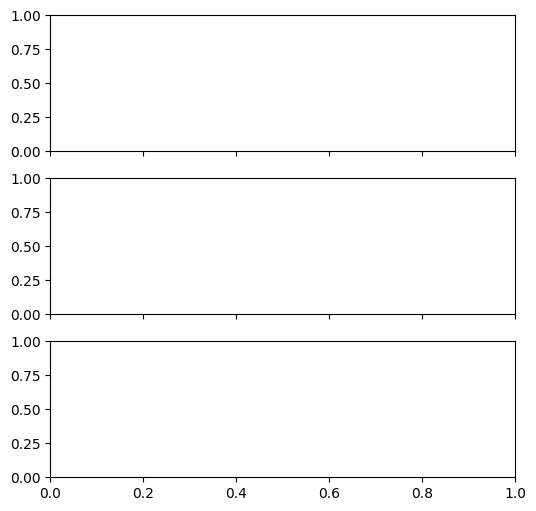

In [11]:
for subject in random_subjects: 
    visualize_data(subject)

# Audio Visualization

In [3]:
num_mel_bins = 64
sampling_rate = 8000
sequence_stride = 160
fft_length = 1000
n_samples = 320000

In [3]:
from scipy.signal import butter, sosfiltfilt

@tf.function
def mel_spec(audio):
    def mel_spec_wrapper(audio_np): 
        sr = 8000
        n_fft = int(0.75 * 8000)
        hop_length = int(0.125 * 8000)
        audio_np = _butter_bandpass_filter(audio_np, 100, 3400, 8000)
        mel_spec = librosa.feature.melspectrogram(y = audio_np, sr = sr, n_fft = n_fft, hop_length = hop_length)
        log_mel_spec = librosa.power_to_db(mel_spec, ref = np.max)
        spec = tf.convert_to_tensor(log_mel_spec, dtype = tf.float32)
        return spec
    
    spec = tf.numpy_function(mel_spec_wrapper, [audio], tf.float32)
    return spec

def _butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low,high], btype='band', analog=False, output='sos')
    y = sosfiltfilt(sos, data)
    return y

In [4]:
data_loader = DataLoader()
non_apnea_files = data_labels[data_labels['label'] == 0]['file'].values.astype(str)
hypopnea_files = data_labels[data_labels['label'] == 1]['file'].values.astype(str)
apnea_files = data_labels[data_labels['label'] == 2]['file'].values.astype(str)

random_non_apnea_files = np.random.choice(non_apnea_files, 10, replace = False)
random_hypopnea_files = np.random.choice(hypopnea_files, 10, replace = False)
random_apnea_files = np.random.choice(apnea_files, 10, replace = False)


In [9]:
def visualize_spo2_audio_stacked(files): 
    dataset = tf.data.Dataset.from_tensor_slices(files)

    dataset = dataset.interleave(
        lambda filename: tf.data.TFRecordDataset(filename, buffer_size=1000000),
        cycle_length=4,  # Number of files read in parallel
        num_parallel_calls=tf.data.experimental.AUTOTUNE  # Optimize for performance
    )

    parsed_data = data_loader.parse_raw_tf_record_dataset(dataset, ['spo2', 'audio'], 'train')

    for data in parsed_data: 
        spo2, audio, label, _ = data
        spectrogram = mel_spec(audio).numpy()
        print(spectrogram.shape)
        fig, ax = plt.subplots(2, 1, figsize = (8, 6), sharex = True)
        ax = ax.flatten()

        sr = 8000
        n_fft = int(0.25 * sr)
        # 0.125 seconds -> 125 ms, hop_length = 1000 
        long_hop_length = int(0.125 * sr)

        ax[0].plot(spo2)
        ax[0].set_ylim(80, 100)
        ax[1].set_ylim(0, 1500)
        mel_spec_display = librosa.display.specshow(spectrogram , sr=8000, x_axis="time", y_axis="linear", ax = ax[1],  hop_length=long_hop_length)
        plt.show()
        plt.close()

In [10]:
visualize_spo2_audio_stacked(random_non_apnea_files)

2025-03-24 10:28:56.534112: W tensorflow/core/framework/op_kernel.cc:1844] UNKNOWN: AttributeError: module 'numba' has no attribute 'core'
Traceback (most recent call last):

  File "/home/hy381/.local/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/tmp/__autograph_generated_file_hdkdgrl.py", line 38, in mel_spec_wrapper
    mel_spec = ag__.converted_call(ag__.ld(librosa).feature.melspectrogram, (), dict(y=ag__.ld(audio_np), sr=ag__.ld(sr), n_fft=ag__.ld(n_fft), hop_length=ag__.ld(hop_length)), fscope_2)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/lazy_loader/__init__.py", line 82, in __getattr__
    submod = importlib.impo

UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_4_device_/job:localhost/replica:0/task:0/device:CPU:0}} Error in user-defined function passed to ParallelMapDatasetV2:38 transformation with iterator: Iterator::Root::ParallelMapV2: AttributeError: module 'numba' has no attribute 'core'
Traceback (most recent call last):

  File "/home/hy381/.local/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/tmp/__autograph_generated_file_hdkdgrl.py", line 38, in mel_spec_wrapper
    mel_spec = ag__.converted_call(ag__.ld(librosa).feature.melspectrogram, (), dict(y=ag__.ld(audio_np), sr=ag__.ld(sr), n_fft=ag__.ld(n_fft), hop_length=ag__.ld(hop_length)), fscope_2)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/lazy_loader/__init__.py", line 82, in __getattr__
    submod = importlib.import_module(submod_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/lib64/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import

  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load

  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked

  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked

  File "<frozen importlib._bootstrap_external>", line 940, in exec_module

  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed

  File "/home/hy381/.local/lib/python3.11/site-packages/librosa/feature/spectral.py", line 15, in <module>
    from ..core.audio import zero_crossings

  File "/home/hy381/.local/lib/python3.11/site-packages/librosa/core/audio.py", line 1158, in <module>
    @guvectorize(
     ^^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/numba/np/ufunc/decorators.py", line 203, in wrap
    guvec.add(fty)

  File "/home/hy381/.local/lib/python3.11/site-packages/numba/np/ufunc/gufunc.py", line 137, in add
    self.gufunc_builder.add(fty)

  File "/home/hy381/.local/lib/python3.11/site-packages/numba/np/ufunc/ufuncbuilder.py", line 257, in add
    cres, args, return_type = _compile_element_wise_function(
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/numba/np/ufunc/ufuncbuilder.py", line 175, in _compile_element_wise_function
    cres = nb_func.compile(sig, **targetoptions)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/numba/np/ufunc/ufuncbuilder.py", line 123, in compile
    return self._compile_core(sig, flags, locals)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/numba/np/ufunc/ufuncbuilder.py", line 150, in _compile_core
    cres = self.cache.load_overload(sig, targetctx)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/numba/core/caching.py", line 679, in load_overload
    target_context.refresh()

  File "/home/hy381/.local/lib/python3.11/site-packages/numba/core/base.py", line 267, in refresh
    self.load_additional_registries()

  File "/home/hy381/.local/lib/python3.11/site-packages/numba/core/cpu.py", line 99, in load_additional_registries
    numba.core.entrypoints.init_all()
    ^^^^^^^^^^

AttributeError: module 'numba' has no attribute 'core'


	 [[{{function_node __inference_mel_spec_105}}{{node PyFunc}}]] [Op:IteratorGetNext] name: 

2025-03-24 10:28:57.386609: W tensorflow/core/framework/op_kernel.cc:1844] UNKNOWN: AttributeError: module 'numba' has no attribute 'core'
Traceback (most recent call last):

  File "/home/hy381/.local/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/tmp/__autograph_generated_file_hdkdgrl.py", line 38, in mel_spec_wrapper
    mel_spec = ag__.converted_call(ag__.ld(librosa).feature.melspectrogram, (), dict(y=ag__.ld(audio_np), sr=ag__.ld(sr), n_fft=ag__.ld(n_fft), hop_length=ag__.ld(hop_length)), fscope_2)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/hy381/.local/lib/python3.11/site-packages/lazy_loader/__init__.py", line 82, in __getattr__
    submod = importlib.impo

In [7]:
for data in parsed_data: 
    spo2, audio, label, _ = data
    spectrogram = mel_spec(audio).numpy()

    fig, ax = plt.subplots(2, 1, figsize = (12, 6), sharex = True)
    ax = ax.flatten()

    sr = 8000
    n_fft = int(0.25 * sr)
    # 0.125 seconds -> 125 ms, hop_length = 1000 
    long_hop_length = int(0.125 * sr)

    ax[0].plot(spo2)
    ax[0].set_ylim(80, 100)
    ax[1].set_ylim(0, 1500)
    mel_spec_display = librosa.display.specshow(spectrogram , sr=8000, x_axis="time", y_axis="linear", ax = ax[1],  hop_length=long_hop_length)


NameError: name 'parsed_data' is not defined